In [1]:
################################################################################
                      # Importando as Bibliotecas
################################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import data_table
data_table.enable_dataframe_formatter()
import warnings
warnings.filterwarnings('ignore')
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 

In [2]:
################################################################################
                # Importando e Concatenando os DataFrames
################################################################################

# England Premier League
df_ENG1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/England%20Premier%20League_20212022.xlsx?raw=true')
# England Championship
df_ENG2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/England%20Championship_20212022.xlsx?raw=true')
# France Ligue 1
df_FRA1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/France%20Ligue%201_20212022.xlsx?raw=true')
# France Ligue 2
df_FRA2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/France%20Ligue%202_20212022.xlsx?raw=true')
# Germany Bundesliga
df_GER1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Germany%20Bundesliga_20212022.xlsx?raw=true')
# Germany 2. Bundesliga
df_GER2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Germany%202.%20Bundesliga_20212022.xlsx?raw=true')
# Italy Serie A
df_ITA1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Italy%20Serie%20A_20212022.xlsx?raw=true')
# Italy Serie B
df_ITA2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Italy%20Serie%20B_20212022.xlsx?raw=true')
# Spain La Liga
df_SPA1 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Spain%20La%20Liga_20212022.xlsx?raw=true')
# Spain Segunda División
df_SPA2 = pd.read_excel('https://github.com/futpythontrader/YouTube/blob/main/Spain%20Segunda%20Divisi%C3%B3n_20212022.xlsx?raw=true')

# Concatenando os DataFrames
df = [df_ENG1,df_ENG2,df_FRA1,df_FRA2,df_GER1,df_GER2,df_ITA1,df_ITA1,df_SPA1,df_SPA2]
df = pd.concat(df)
df = df[['Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over05','FT_Odds_Over15','FT_Odds_Over25','FT_Odds_BTTS_Yes','FT_Goals_H','FT_Goals_A']]

In [3]:
df

Output hidden; open in https://colab.research.google.com to view.

In [4]:
################################################################################
                # Organizando do DataFrame
################################################################################

# Criando a Coluna de 0 e 1 para análise do Modelo de Machine Learning
df.loc[(df['FT_Goals_H'] > df['FT_Goals_A']), 'BackHome'] = 1
df.loc[(df['FT_Goals_H'] <= df['FT_Goals_A']), 'BackHome'] = 0

# Separando os DataFrames para análise do Profit
df1 = df[['Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over05','FT_Odds_Over15','FT_Odds_Over25','FT_Odds_BTTS_Yes','BackHome']]
df2 = df[['FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over05','FT_Odds_Over15','FT_Odds_Over25','FT_Odds_BTTS_Yes','BackHome']]

In [5]:
################################################################################
                # Separar Dados em Treino e Teste
################################################################################

x1 = df1.iloc[:, :].values
y1 = df1.iloc[:, -1].values

x1_train, x1_test, y1_train, y1_test = ms.train_test_split(x1, y1, test_size = 0.3, random_state = 0)

df1 = pd.DataFrame(x1_test)
df1.columns = ['Home','Away','FT_Odds_H','FT_Odds_D','FT_Odds_A','FT_Odds_Over05','FT_Odds_Over15','FT_Odds_Over25','FT_Odds_BTTS_Yes','BackHome']


x2 = df2.iloc[:,:-1].values
y2 = df2.iloc[:, -1].values

x2_train, x2_test, y2_train, y2_test = ms.train_test_split(x2, y2, test_size = 0.3, random_state = 0)

In [6]:
x1_train

array([['Newcastle United', 'Leeds United', 3.0, ..., 1.65, 1.47, 0.0],
       ['Spezia', 'Empoli', 2.32, ..., 1.57, 1.53, 0.0],
       ['Paderborn', 'Darmstadt 98', 2.42, ..., 1.6, 1.5, 0.0],
       ...,
       ['Ajaccio', 'Dunkerque', 1.47, ..., 2.75, 2.6, 1.0],
       ['Lazio', 'Sassuolo', 1.73, ..., 1.51, 1.57, 1.0],
       ['Atalanta', 'Sassuolo', 1.54, ..., 1.53, 1.62, 1.0]], dtype=object)

In [7]:
x2_train

array([[3.  , 3.65, 2.3 , ..., 1.24, 1.65, 1.47],
       [2.32, 3.76, 3.07, ..., 1.19, 1.57, 1.53],
       [2.42, 3.55, 2.65, ..., 1.15, 1.6 , 1.5 ],
       ...,
       [1.47, 3.28, 7.6 , ..., 1.48, 2.75, 2.6 ],
       [1.73, 3.9 , 4.4 , ..., 1.18, 1.51, 1.57],
       [1.54, 4.55, 6.  , ..., 1.18, 1.53, 1.62]])

In [8]:
x1_test

array([['West Bromwich Albion', 'Bristol City', 1.71, ..., 2.01, 2.0,
        1.0],
       ['Inter Milan', 'Roma', 1.67, ..., 1.67, 1.68, 1.0],
       ['Coventry City', 'Hull City', 1.7, ..., 1.98, 1.83, 0.0],
       ...,
       ['Cádiz', 'Sevilla FC', 5.5, ..., 2.3, 2.05, 0.0],
       ['Aston Villa', 'West Ham United', 2.8, ..., 1.74, 1.67, 0.0],
       ['Paris', 'Amiens SC', 1.85, ..., 2.55, 2.2, 1.0]], dtype=object)

In [9]:
x2_test

array([[1.71, 3.7 , 5.2 , ..., 1.33, 2.01, 2.  ],
       [1.67, 3.9 , 4.8 , ..., 1.22, 1.67, 1.68],
       [1.7 , 3.6 , 5.  , ..., 1.31, 1.98, 1.83],
       ...,
       [5.5 , 3.4 , 1.7 , ..., 1.45, 2.3 , 2.05],
       [2.8 , 3.5 , 2.45, ..., 1.28, 1.74, 1.67],
       [1.85, 3.3 , 4.35, ..., 1.47, 2.55, 2.2 ]])

In [10]:
################################################################################
                           # Treinando o Modelo
################################################################################

classifier = SVC(kernel='rbf')
classifier.fit(x2_train, y2_train)

SVC()

In [11]:

################################################################################
                                # Previsão
################################################################################
 
y2_pred = classifier.predict(x2_test)
y2_result = np.concatenate((y2_pred.reshape(len(y2_pred),1), y2_test.reshape(len(y2_test),1)),1)

In [12]:
################################################################################
                            # Matriz de Confusão
################################################################################
 
cm = confusion_matrix(y2_test, y2_pred)
print(cm)
print(accuracy_score(y2_test, y2_pred))


[[588  75]
 [326 187]]
0.6590136054421769


In [13]:
# jogos totais usados para teste
jogos_total_teste = confusion_matrix(y2_test, y2_pred)[0][0]+confusion_matrix(y2_test, y2_pred)[0][1]+confusion_matrix(y2_test, y2_pred)[1][0]+confusion_matrix(y2_test, y2_pred)[1][1]
jogos_total_teste

1176

In [14]:
# quantidade total de entrada
jogos_entrada = confusion_matrix(y2_test, y2_pred)[0][1]+confusion_matrix(y2_test, y2_pred)[1][1]
jogos_entrada

262

In [15]:
# calculando a taxa de entrada
taxa_de_entrada = (jogos_entrada/jogos_total_teste)*100
taxa_de_entrada

22.27891156462585

In [16]:
# calculando a taxa de acerto
taxa_de_acerto = (confusion_matrix(y2_test, y2_pred)[1][1]/jogos_entrada)*100
taxa_de_acerto

71.37404580152672

Nº
262    14.15
Name: Profit_acu, dtype: object

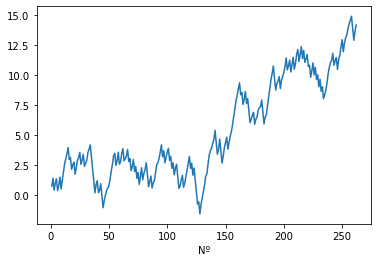

In [17]:
################################################################################
                      # Profit Acumulado do Teste
################################################################################

df1["Previsões"] = y2_pred

stake = 1
green = stake * (df1.FT_Odds_H - 1)
red = -stake

df1.loc[(df1['Previsões'] == 1) & (df1['BackHome'] == 1), 'Profit'] = green
df1.loc[(df1['Previsões'] == 1) & (df1['BackHome'] == 0), 'Profit'] = red
df1.loc[(df1['Previsões'] == 0) & (df1['BackHome'] == 1), 'Profit'] = 0
df1.loc[(df1['Previsões'] == 0) & (df1['BackHome'] == 0), 'Profit'] = 0

filtro = df1.Previsões == 1
df0 = df1[filtro]

# Ajustando o Índice
df0.reset_index(inplace=True, drop=True)
df0.index = df0.index.set_names(['Nº'])
df0 = df0.rename(index=lambda x: x + 1)

df0['Profit_acu'] = df0.Profit.cumsum()
df0.Profit_acu.plot()
df0.Profit_acu.tail(1)